In [1]:
from sklearn.datasets import load_iris
iris_bunch = load_iris()

In [2]:
X = iris_bunch.data

y = iris_bunch.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state = 5, test_size = 0.25) 

# Normalising The Data.

In [4]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Implimenting PCA

In [5]:
from sklearn.decomposition import PCA

pca_obj = PCA()

In [6]:
X_train_pca = pca_obj.fit_transform(X_train)
X_test_pca = pca_obj.fit_transform(X_test)

In [7]:
pca_obj.explained_variance_ratio_

array([0.73744719, 0.21241944, 0.04465979, 0.00547358])

In [8]:
print(pca_obj.explained_variance_ratio_)

[0.73744719 0.21241944 0.04465979 0.00547358]


 0.7374 or **73.74 %** of variance is explained by **first principal component**
    
 0.21241944   or **21.24%** of variance is explained by **Second principal component**
    
 0.04465 or **4.65** % of variance is explained by **third principal component**
    
 0.0054 or **0.5 %** of variance is explained by **fourth principal component**

The variance captured by the first 2 principal components itself is a whooping 94% So,it is enough if we build our learning model using the first 2 components itself.

In [9]:
pca_obj2 = PCA(n_components=2)

X_train_pca2 = pca_obj2.fit_transform(X_train) # We are using only features only
X_test_pca2 = pca_obj2.fit_transform(X_test)

In [10]:
pca_obj2.explained_variance_ratio_

array([0.73744719, 0.21241944])

In [11]:
print(X_train_pca2.shape)

print(X_test_pca2.shape)

(112, 2)
(38, 2)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_pca2,y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test_pca2)

In [14]:
from sklearn.metrics import accuracy_score

print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.8947368421052632


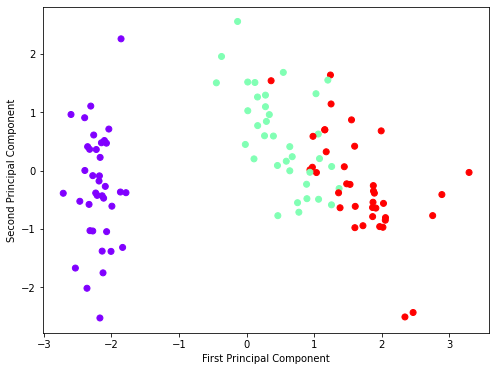

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(X_train_pca2[:,0],X_train_pca2[:,1],c=y_train,cmap="rainbow")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

# LDA 

# Normalising Data

In [16]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [18]:
lda = LDA()

X_train_lda = lda.fit_transform(X_train,y_train) # Using both feature and target variable.
X_test_lda = lda.transform(X_test) # use only the features for transforming the test dataset.

print(lda.explained_variance_ratio_)

[0.98969627 0.01030373]


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_lda,y_train)

KNeighborsClassifier()

In [20]:
pred = knn.predict(X_test_lda)


In [21]:
knn.predict(X_test_lda)


array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [22]:
print("Accuracy",accuracy_score(y_test,pred))

Accuracy 0.9473684210526315


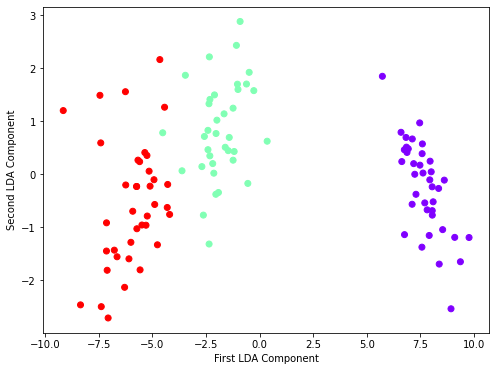

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(X_train_lda[:,0],X_train_lda[:,1],c=y_train,cmap="rainbow")
plt.xlabel("First LDA Component")
plt.ylabel("Second LDA Component")
plt.show()

# End Of Session...